In [1]:
%matplotlib inline
import os
import sys
sys.path.append('/root/capsule/aind-beh-ephys-analysis/code/beh_ephys_analysis')
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
import json
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import re
from utils.beh_functions import session_dirs
from utils.plot_utils import shiftedColorMap, template_reorder, plot_raster_bar,merge_pdfs
from opto_tagging import opto_plotting_session
from open_ephys.analysis import Session
import spikeinterface as si
import spikeinterface.extractors as se
import spikeinterface.postprocessing as spost
import spikeinterface.widgets as sw
from aind_ephys_utils import align
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colormaps
import pickle

from aind_dynamic_foraging_basic_analysis.licks.lick_analysis import load_nwb
from aind_dynamic_foraging_data_utils.nwb_utils import load_nwb_from_filename

 
# Create a white-to-bright red colormap
colors = [(1, 1, 1), (1, 0, 0)]  # white to red
my_red = LinearSegmentedColormap.from_list("white_to_red", colors)

In [4]:
session = 'behavior_751004_2024-12-20_13-26-11'
session_dir = session_dirs(session)

In [ ]:
# unit_table = opto_plotting_session(session, 'curated', 'soma')

In [13]:
# def load_motion_info(folder):
from spikeinterface.preprocessing.motion import load_motion_info

# folder = Path(folder)

# motion_info = {}

# with open(folder / "parameters.json") as f:
#     motion_info["parameters"] = json.load(f)

# with open(folder / "run_times.json") as f:
#     motion_info["run_times"] = json.load(f)

# array_names = ("peaks", "peak_locations")
# for name in array_names:
#     if (folder / f"{name}.npy").exists():
#         motion_info[name] = np.load(folder / f"{name}.npy")
#     else:
#         motion_info[name] = None

motion_info = load_motion_info('/root/capsule/data/behavior_751004_2024-12-19_11-50-37_sorted/preprocessed/motion/experiment1_Record Node 104#Neuropix-PXI-100.ProbeA_recording1')

In [19]:
motion_info['motion']

AssertionError: 

In [27]:
np.squeeze(np.array(motion_info['motion'].displacement))

array([[-55.48262974, -55.34431859, -53.81398151, ..., -15.50918633,
         -7.66302752, -16.50154958],
       [-55.36509382, -55.22661019, -53.66518395, ..., -15.72292869,
         -7.87733319, -16.73010304],
       [-55.47083337, -55.32810103, -53.57122905, ..., -16.01167879,
         -8.18809207, -17.04272919],
       ...,
       [ -8.83592654,  -8.84276715,  -8.22137065, ...,  16.85320573,
        -31.41667618,   3.86838904],
       [ -9.84112394,  -9.85037347,  -9.213235  , ...,  16.94871732,
        -31.27550344,   3.92068106],
       [-10.27982597, -10.2865863 ,  -9.62502547, ...,  16.95787782,
        -31.33614374,   3.88615499]])

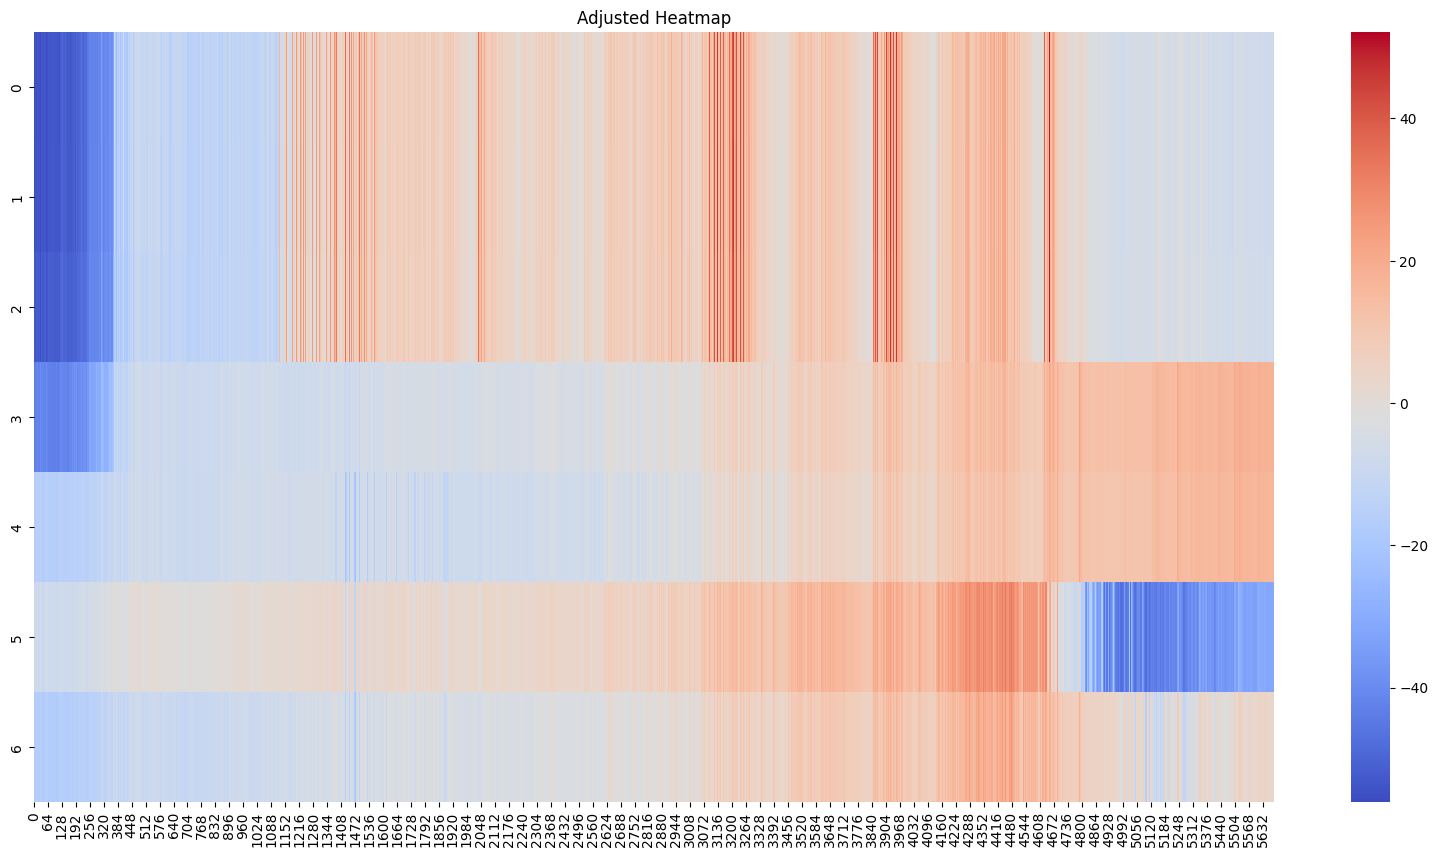

In [52]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate random data (10x5 matrix)
data = np.random.rand(10, 5)
data = np.array(motion_info['motion'].displacement)[0,:,:].T

# Create a larger figure
plt.figure(figsize=(20, 10))  # Adjust width and height
sns.heatmap(data, cmap="coolwarm")

plt.title("Adjusted Heatmap")
plt.show()


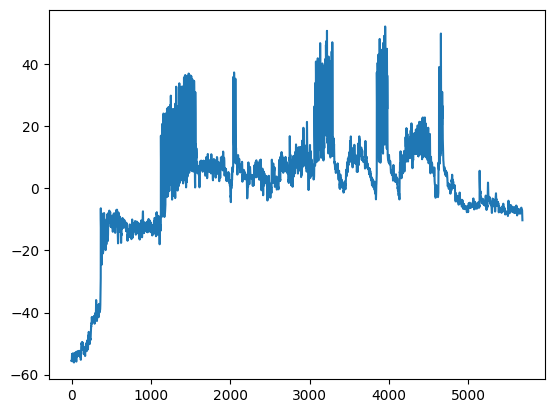

In [38]:
plt.plot(np.array(motion_info['motion'].displacement)[0, :, 0])